In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mushrooms.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# EDA

<Axes: xlabel='class', ylabel='count'>

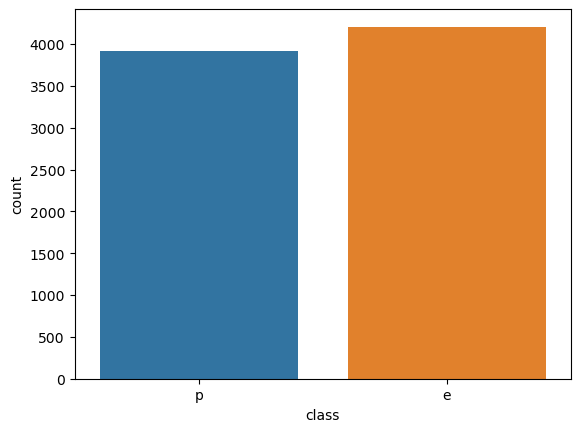

In [3]:
sns.countplot(data=df , x='class' , hue='class')

In [4]:
df.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


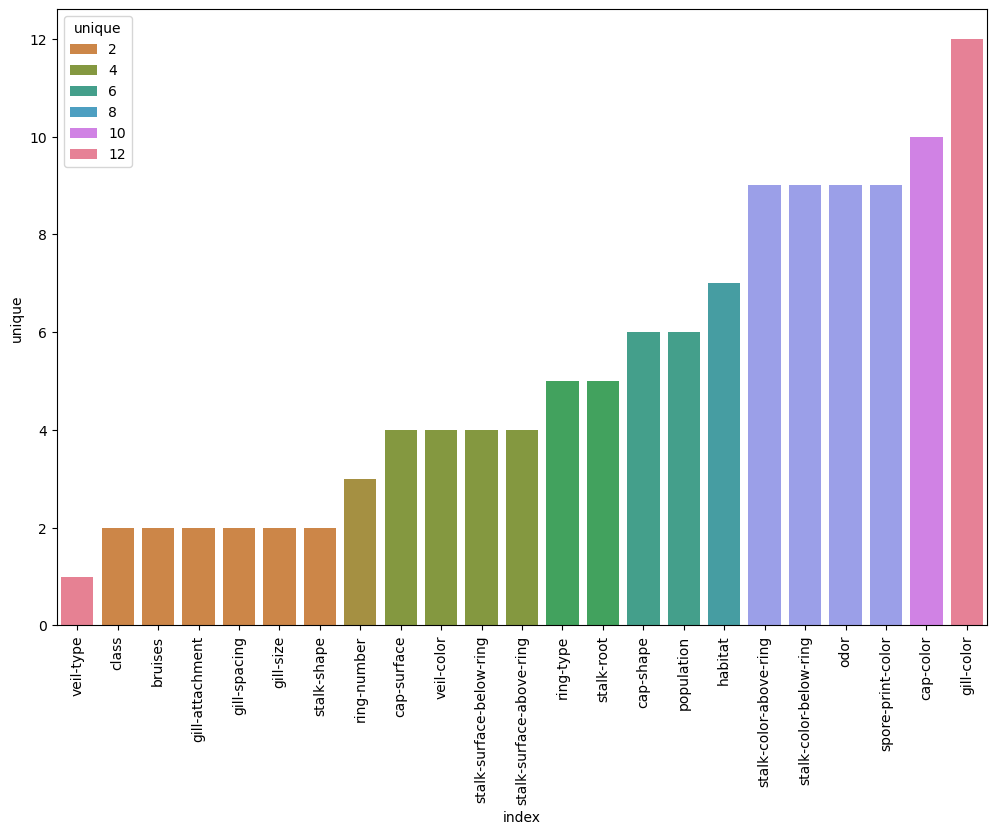

In [5]:
plt.figure(figsize=(12 , 8))
sns.barplot(x='index' , y='unique' , data=df.describe().transpose().reset_index().sort_values('unique') , palette='husl' , hue='unique')
plt.xticks(rotation=90);

In [6]:
X=df.drop('class' , axis=1)
X=pd.get_dummies(X , drop_first=True)
y=df['class']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [8]:
from sklearn.ensemble import AdaBoostClassifier

In [9]:
ada_model=AdaBoostClassifier(n_estimators=1 , algorithm='SAMME')
ada_model.fit(X_train , y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=1)

In [10]:
y_pred=ada_model.predict(X_test)

In [11]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay , accuracy_score

In [12]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



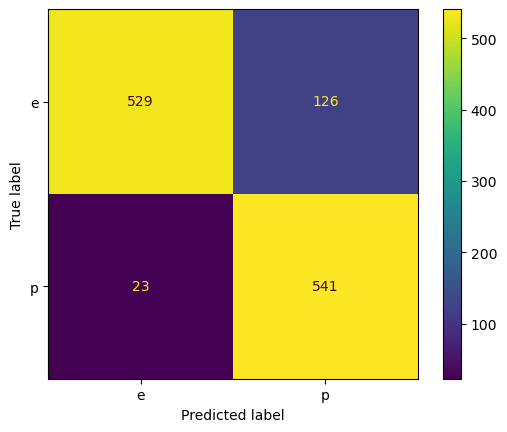

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

In [14]:
ada_model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
ada_model.feature_importances_.argmax()

22

In [16]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

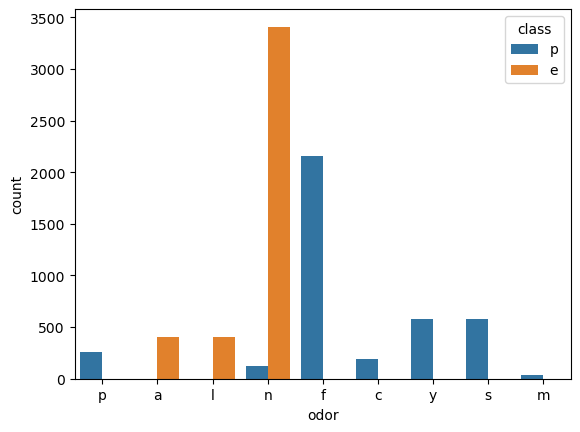

In [17]:
sns.countplot(data=df , x='odor' , hue='class')

In [18]:
len(X.columns)

95

In [19]:
model_95=AdaBoostClassifier(n_estimators=95 , algorithm='SAMME')
model_95.fit(X_train , y_train)
pred_95=model_95.predict(X_test)

In [20]:
model_95.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08758134, 0.15483051,
       0.03297374, 0.        , 0.07596867, 0.08553577, 0.        ,
       0.        , 0.        , 0.01449336, 0.04761456, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02261282, 0.        , 0.01960917, 0.        , 0.        ,
       0.04145947, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03716765, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02345876, 0.        , 0.     

In [21]:
features=pd.DataFrame(data=model_95.feature_importances_ , index=X.columns , columns=['importance'])
features

,importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [22]:
features=features[features['importance']>0].sort_values('importance')
features

,importance
spore-print-color_n,0.012845
spore-print-color_u,0.014081
gill-spacing_w,0.014493
stalk-root_c,0.019609
stalk-shape_t,0.022613
ring-type_f,0.023459
spore-print-color_w,0.024706
population_v,0.029857
population_c,0.031219
odor_l,0.032974


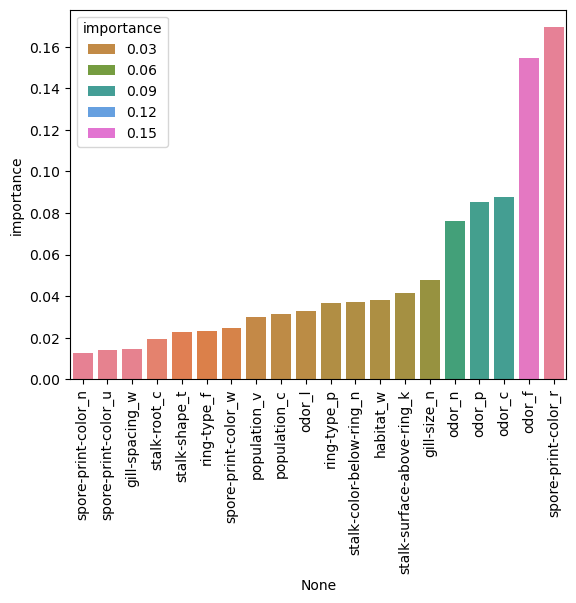

In [23]:
sns.barplot(data=features , x=features.index , y='importance' , hue='importance' , palette='husl')
plt.xticks(rotation=90);

In [24]:
print(classification_report(y_test , pred_95))

              precision    recall  f1-score   support

           e       0.99      1.00      1.00       655
           p       1.00      0.99      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



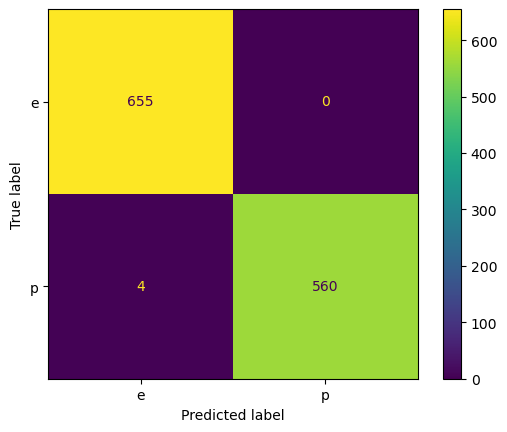

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test , pred_95)

In [26]:
error_rate=[]
for n in range(1 , 96):
    model=AdaBoostClassifier(n_estimators=n , algorithm='SAMME')
    model.fit(X_train , y_train)
    model_pred=model.predict(X_test)
    error=1- accuracy_score(y_test , model_pred)
    error_rate.append(error)

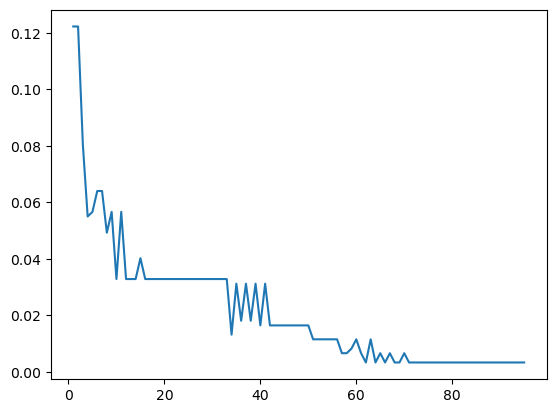

In [46]:
plt.plot(range(1 , 96) , error_rate)

In [47]:
for index , num in enumerate(error_rate , start=58):
    print(index,'------------' , num)

58 ------------ 0.12223133716160783
59 ------------ 0.12223133716160783
60 ------------ 0.08039376538146026
61 ------------ 0.054963084495488146
62 ------------ 0.05660377358490565
63 ------------ 0.06398687448728468
64 ------------ 0.06398687448728468
65 ------------ 0.04922067268252661
66 ------------ 0.05660377358490565
67 ------------ 0.03281378178835115
68 ------------ 0.05660377358490565
69 ------------ 0.03281378178835115
70 ------------ 0.03281378178835115
71 ------------ 0.03281378178835115
72 ------------ 0.040196882690730074
73 ------------ 0.03281378178835115
74 ------------ 0.03281378178835115
75 ------------ 0.03281378178835115
76 ------------ 0.03281378178835115
77 ------------ 0.03281378178835115
78 ------------ 0.03281378178835115
79 ------------ 0.03281378178835115
80 ------------ 0.03281378178835115
81 ------------ 0.03281378178835115
82 ------------ 0.03281378178835115
83 ------------ 0.03281378178835115
84 ------------ 0.03281378178835115
85 ------------ 0.03281378

In [48]:
ada_model73= AdaBoostClassifier(n_estimators=73 , algorithm='SAMME')
ada_model73.fit(X_train , y_train)
pred_73=ada_model61.predict(X_test)

In [49]:
ada_model73.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06421015, 0.17488515,
       0.04030552, 0.        , 0.07785225, 0.07855522, 0.        ,
       0.        , 0.        , 0.01771599, 0.05820176, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02764083, 0.        , 0.02396931, 0.        , 0.        ,
       0.0378715 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03132738, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01670255, 0.        , 0.     

In [50]:
fea_imp=pd.DataFrame(data=ada_model73.feature_importances_ , index=X.columns , columns=['importance'])
fea_imp=fea_imp[fea_imp['importance']>0].sort_values('importance')
fea_imp

,importance
population_c,0.015798
ring-type_f,0.016703
spore-print-color_u,0.017212
gill-spacing_w,0.017716
stalk-root_c,0.023969
stalk-shape_t,0.027641
spore-print-color_w,0.030200
stalk-color-below-ring_n,0.031327
habitat_w,0.035309
population_v,0.036496


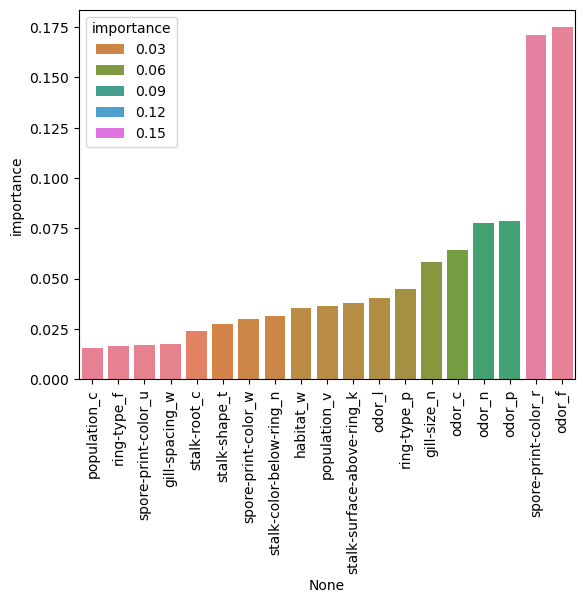

In [51]:
sns.barplot(data=fea_imp , x=fea_imp.index , y='importance' ,  hue='importance' , palette='husl')
plt.xticks(rotation=90);

<Axes: xlabel='spore-print-color', ylabel='class'>

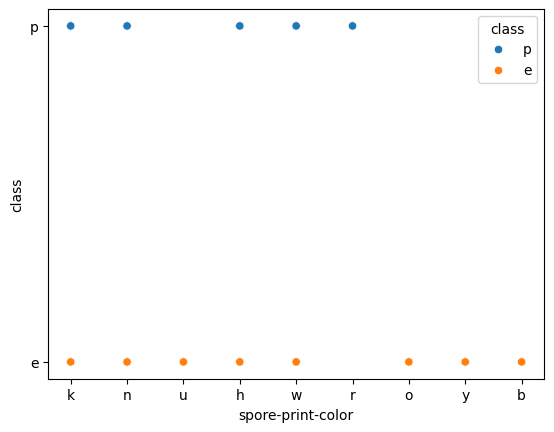

In [52]:
sns.scatterplot(x=df['spore-print-color'] , y=df['class'] , hue=df['class'])

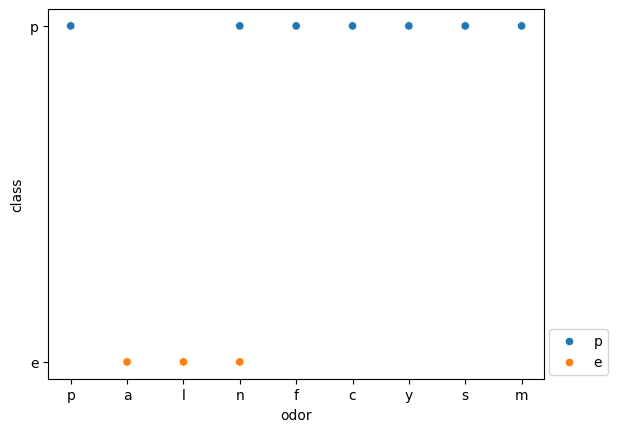

In [53]:
sns.scatterplot(x=df['odor'] , y=df['class'] , hue=df['class'])
plt.legend(loc=(1.01 , 0.01))

In [54]:
print(classification_report(y_test , pred_73))

              precision    recall  f1-score   support

           e       0.99      1.00      1.00       655
           p       1.00      0.99      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



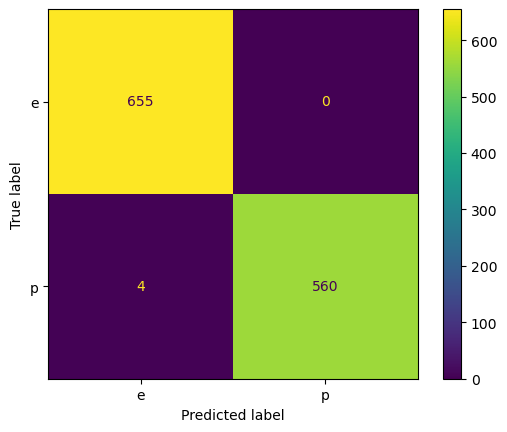

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test , pred_73)